In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#hydrophones
h=np.array([[0,0,0],[10,0,0],[3,10,0]])

#simulasted whale location above hydrophone plane
w=np.array([4,3,2])

# whale directions from hydrophone
D=w-h
# slant ranges
R=np.sqrt(np.sum(D**2,1))

# for selecting hydrophone pairs
im1=[1,2]
im0=[0,0]
#
# simulated path differences
DR=R[im1]-R[im0]
#

# estimation
b0=np.sum(h[im1,:]**2,1) - np.sum(h[im0,:]**2,1)-(DR**2)
b1=2*DR

A=2*(h[im1,:]-h[im0,:])
AI=np.linalg.pinv(A)

u0=(AI@b0).reshape(-1,1)
u1=(AI@b1).reshape(-1,1)

rr=np.arange(0,10,0.01)
vv=u0-u1*rr

# direction estimation
az=np.arctan2(-u1[1],-u1[0])*180/np.pi

# check with simulation
z=w-u0.T
z1=z/np.sqrt(np.sum(z**2))
azo=np.arctan2(z1[0,1],z1[0,0])*180/np.pi
print('z:',z)
print('z1:',z1)
print('u1:',u1.T)
print('az:',az)
print('azo:',azo)
if 1:
    plt.plot(h[:,0],h[:,1],'o')
    plt.plot(w[0],w[1],'o')
    plt.plot(u0[0],u0[1],'x')
    plt.plot(vv[0,:],vv[1,:])
    plt.show()


NameError: name 'np' is not defined

estimation results
range: 5.38
est. location: [3.9992192  2.99928495 2.        ]
true location: [4 3 2]


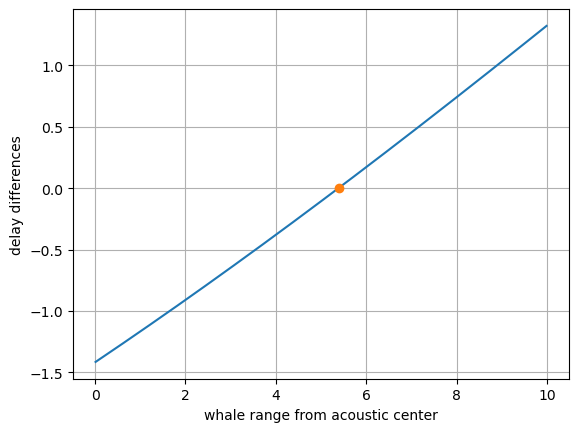

In [32]:
# range estimation
# simulate range of whale from acoustic center
# and estimate for given whale height of hydrophone the elevation angle
ze=2
rr=np.arange(0.01,10,0.01)
u1z=(ze-u0[2])/rr
#get hypothetical whale location as function of elevation angle
vv=u0-u1*rr
vv[2,:]=ze

#compare simulated delay with measured delay 
v0=vv-h[0,:].reshape(-1,1)
v1=vv-h[1,:].reshape(-1,1)
rr0=(np.sqrt(np.sum(v0**2,0)))
rr1=(np.sqrt(np.sum(v1**2,0)))

#find where simulated delay fits measured delay
drr1=rr1-rr0

rrx=np.where(drr1>=DR[0])[0][0]
irx=int(rrx)
print('estimation results')
print("range:",rrx/100)
print('est. location:',vv[:,irx])
print('true location:', w)

plt.plot(rr,drr1-DR[0])
plt.plot(rr[irx],0,'o')
plt.xlabel('whale range from acoustic center')
plt.ylabel('delay differences')
plt.grid(True)
plt.show()